
"The aim of this study is to investigate the relationship between food production, environmental impact, and food waste in European countries. Specifically, the research seeks to address the following questions:

What is the magnitude of environmental impact (e.g., greenhouse gas emissions, land use, freshwater withdrawals) associated with food production in European countries?

How does food waste vary across European countries, and what are the primary sources of food waste (household, retail, food service)?
What is the environmental impact of food production in European countries?

What factors contribute to differences in environmental impact and food waste among European countries?


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data_F=pd.read_csv("Food_Production.csv")
#data_F
#pivot_df = data_F.pivot_table(data_F, index='index')
#pivot_df

In [23]:
data_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [24]:
data_F.isnull().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [25]:
data_F.nunique()

Food product                                                               43
Land use change                                                            21
Animal Feed                                                                10
Farm                                                                       24
Processing                                                                 10
Transport                                                                   8
Packging                                                                   10
Retail                                                                      4
Total_emissions                                                            33
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   33
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   38
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      27
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [26]:
data_F['Food product'].unique()
#data_F['Food product'] = data_F['Food product'].str.strip()[0]
#data_F['Food product'].unique()
data_F['Food product'] = data_F['Food product'].str.split().str[0]
data_F['Food product'].unique()


array(['Wheat', 'Maize', 'Barley', 'Oatmeal', 'Rice', 'Potatoes',
       'Cassava', 'Cane', 'Beet', 'Other', 'Peas', 'Nuts', 'Groundnuts',
       'Soymilk', 'Tofu', 'Soybean', 'Palm', 'Sunflower', 'Rapeseed',
       'Olive', 'Tomatoes', 'Onions', 'Root', 'Brassicas', 'Citrus',
       'Bananas', 'Apples', 'Berries', 'Wine', 'Coffee', 'Dark', 'Beef',
       'Lamb', 'Pig', 'Poultry', 'Milk', 'Cheese', 'Eggs', 'Fish',
       'Shrimps'], dtype=object)

In [27]:
data_F

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.552080,NaN


In [28]:
data_F.to_csv('Food_prodcution_emission.csv', index=False)

In [9]:
columndfwf=['Maize Production (tonnes)',
       'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
       'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)',
       'Tea  Production ( tonnes )', 'Sweet potatoes  Production (tonnes)',
       'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)',
       'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
       'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)',
       'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)',
       'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)',
       'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)',
       'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
       'Apples Production (tonnes)'],

years = [2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021]

filtered_df_FW = filtered_df_FW[filtered_df_FW['Year'].isin(years)]

In [10]:
data_F.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [11]:
columns_to_round =['Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
       'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']
data_F[columns_to_round] = data_F[columns_to_round].round(2)

In [12]:
data_F

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.28,...,371.08,482.4,0.95,1.91,2.90,7.60,5.85,18786.2,14450.92,7162.10
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.51,...,3166.76,2248.4,1.21,6.27,0.76,2.80,3.94,49576.3,69825.77,13449.89
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.75,...,347.65,59.1,0.63,2.71,1.20,0.88,5.18,2754.2,16201.18,3762.57
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.71,...,NaN,0.0,1.36,14.67,1.86,1.81,20.11,0.0,NaN,NaN
7,Cane,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.82,...,NaN,620.1,0.91,NaN,0.58,2.04,NaN,16438.6,NaN,4683.36
8,Beet,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.54,...,NaN,217.7,0.52,NaN,0.52,1.83,NaN,9493.3,NaN,2704.64
9,Other,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.01,...,203.50,435.7,0.52,0.84,4.57,15.57,7.27,22477.4,10498.55,NaN


plt.figure(figsize=(20,10))
plt.plot(data_F["Land use change"],color="red")
plt.show()

### Research Question 1: What is the magnitude of environmental impact associated with food production in European countries?

In [13]:
Impact = data_F.groupby('Food product')[['Total_emissions','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Freshwater withdrawals per kilogram (liters per kilogram)']].mean().round(2)


In [14]:
data_F.columns
col_impact2 =  ['Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail']

In [15]:
Impact2 = data_F.groupby('Food product')[col_impact2].mean().round(2)


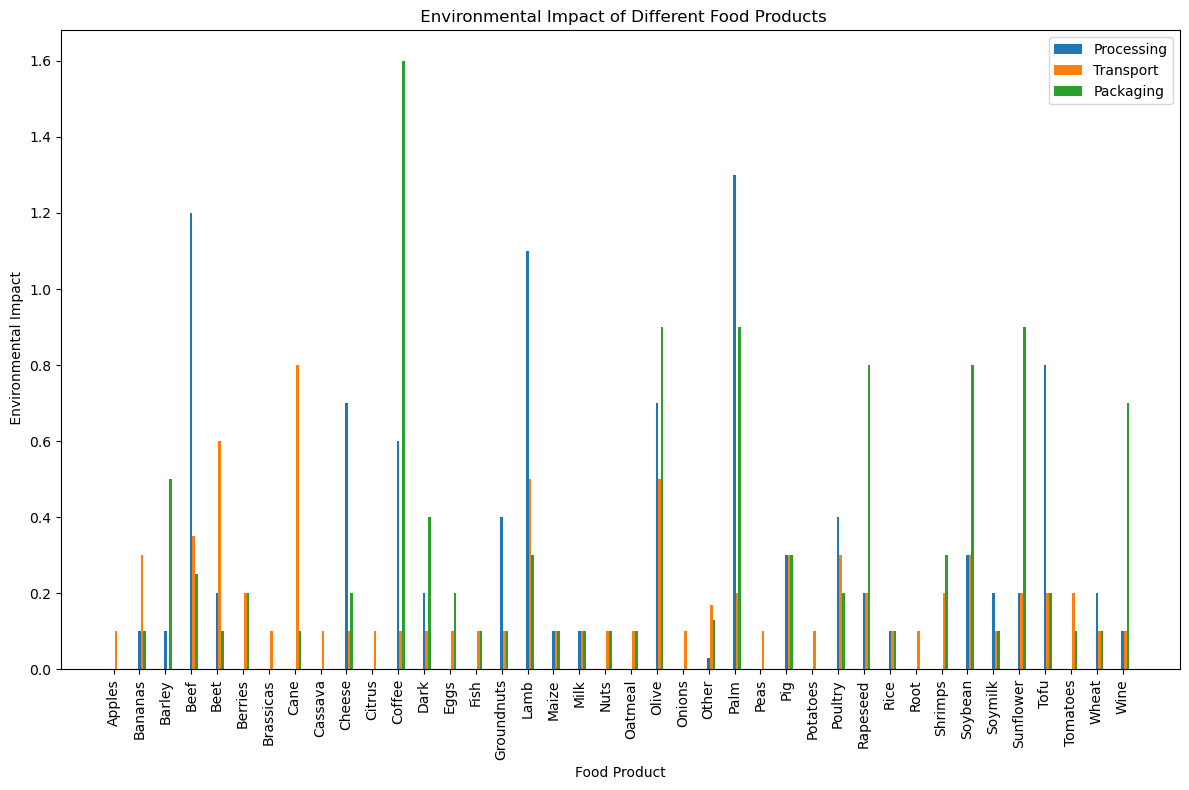

In [16]:
food_products = Impact2.index
land_use_change = Impact2['Land use change']
animal_feed = Impact2['Animal Feed']
farm = Impact2['Farm']
processing = Impact2['Processing']
transport = Impact2['Transport']
packaging = Impact2['Packging']
retail = Impact2['Retail']

# number of bars 
num_bars = len(food_products)
ind = range(num_bars)

width = 0.1

# Plot 
plt.figure(figsize=(12, 8))
#plt.bar(ind, land_use_change, width, label='Land Use Change')
#plt.bar([i + width for i in ind], animal_feed, width, label='Animal Feed')
#plt.bar([i + 2*width for i in ind], farm, width, label='Farm')
plt.bar([i + 3*width for i in ind], processing, width, label='Processing')
plt.bar([i + 4*width for i in ind], transport, width, label='Transport')
plt.bar([i + 5*width for i in ind], packaging, width, label='Packaging')
#plt.bar([i + 6*width for i in ind], retail, width, label='Retail')

#  labels, title, legend
plt.xlabel('Food Product')
plt.ylabel(' Environmental Impact')
plt.title(' Environmental Impact of Different Food Products')
plt.xticks([i + 3*width for i in ind], food_products, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
transposed_mean_impact = Impact.transpose()


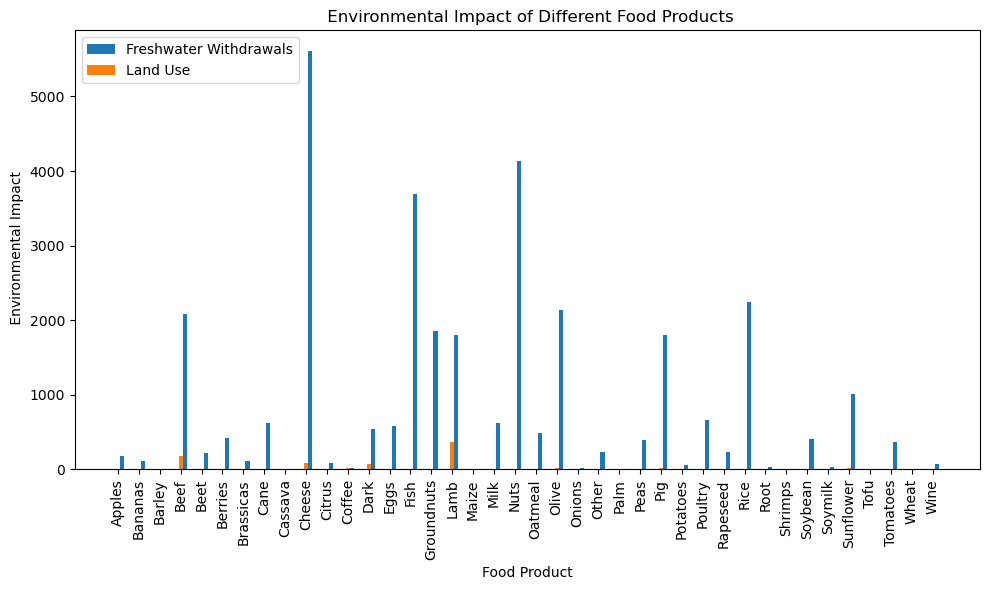

In [18]:

food_products = Impact.index
total_emissions = Impact['Total_emissions']
Greenhouse_emissions = Impact['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']
land_use = Impact['Land use per kilogram (m² per kilogram)']
freshwater_withdrawals = Impact['Freshwater withdrawals per kilogram (liters per kilogram)']


# number of bars
num_bars = len(food_products)
ind = range(num_bars)

width = 0.2

# Plot 
plt.figure(figsize=(10, 6))
plt.bar([i + 2*width for i in ind], freshwater_withdrawals, width, label='Freshwater Withdrawals')
plt.bar([i + width for i in ind], land_use, width, label='Land Use')

#  labels, title,  legend
plt.xlabel('Food Product')
plt.ylabel(' Environmental Impact')
plt.title(' Environmental Impact of Different Food Products')
plt.xticks([i + width for i in ind], food_products, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


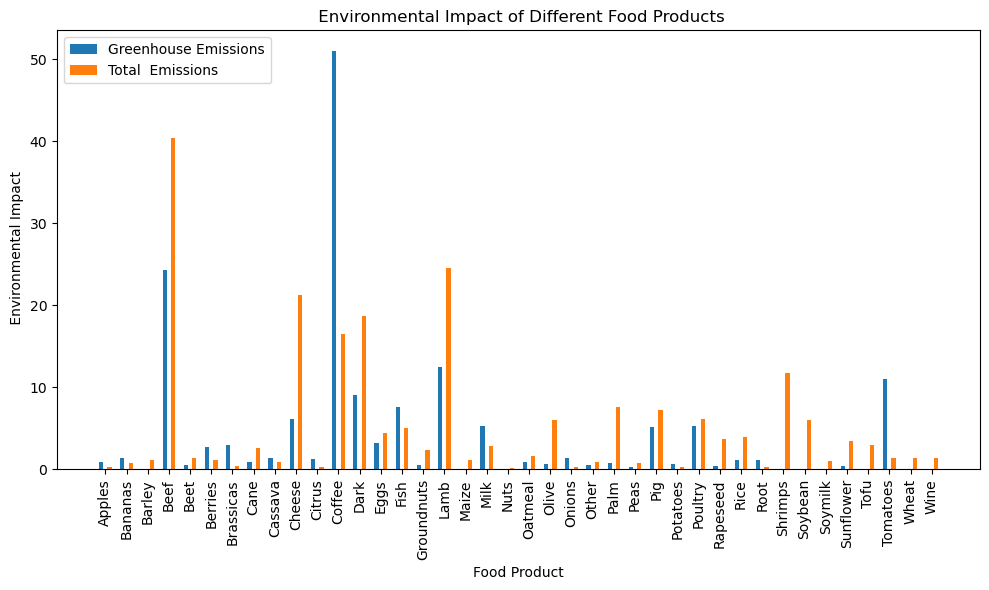

In [19]:
num_bars = len(food_products)
ind = range(num_bars)
total_emissions = Impact['Total_emissions']

width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(ind, Greenhouse_emissions, width, label='Greenhouse Emissions')
plt.bar([i + 2*width for i in ind], total_emissions, width, label='Total  Emissions')


plt.xlabel('Food Product')
plt.ylabel(' Environmental Impact')
plt.title(' Environmental Impact of Different Food Products')
plt.xticks([i + width for i in ind], food_products, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


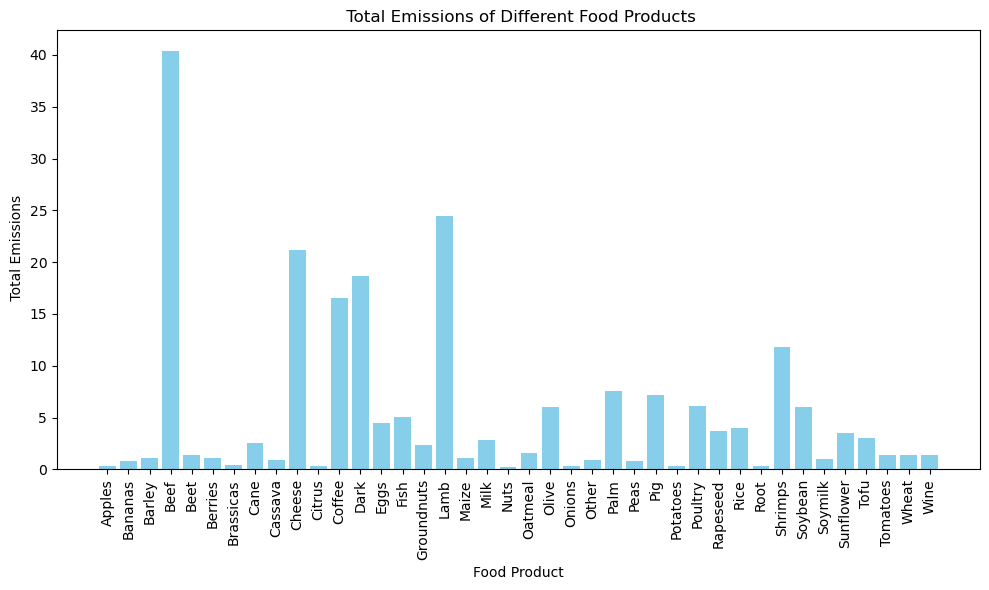

In [20]:
total_emissions = Impact['Total_emissions']

# Plot 
plt.figure(figsize=(10, 6))
plt.bar(Impact.index, total_emissions, color='skyblue')

#  labels, title
plt.xlabel('Food Product')
plt.ylabel(' Total Emissions')
plt.title(' Total Emissions of Different Food Products')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
